Research project discussion 
Kaggle competitions, UCI as data sources
Logistic regression, objective & cost function


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

Research Project Discussion:

Big data projects
1. Kaggle (https://www.kaggle.com/datasets)
2. UCI datasets (https://archive.ics.uci.edu/ml/datasets.html)
3. Web Scraping

Machine learning apps
1. Define problem (example http://blog.venturepact.com/10-examples-of-machine-learning-mobile-apps/)
    

Logistic Regression, Objecttive and Cost Function

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [2]:
%pwd

'/Users/ram/Desktop/CSYE7245'

In [3]:
!ls

Advertising.csv              NE_SyllabusCSYE7245.docx
CSYE 7245 Week II code.ipynb PS I
CSYE 7245 WeekIII code.ipynb PS I.zip


In [4]:
core_path = '/Users/ram/Desktop/CSYE7245'

In [6]:
ad_df = pd.read_csv(f'{core_path}/Advertising.csv',index_col =0)
print(ad_df.shape)
ad_df.head(3)

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [7]:
ad_df["Sales"].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [17]:
def bin_sales(x):
    if x <= 10:
        return "low"
    elif x > 10 and x < 20:
        return "medium"
    elif x > 20:
        return "high"

In [18]:
ad_df["sales bin"] = ad_df["Sales"].apply(bin_sales)
print(ad_df.shape)
ad_df.head(3)

(200, 5)


,TV,Radio,Newspaper,Sales,sales bin
1,230.1,37.8,69.2,22.1,high
2,44.5,39.3,45.1,10.4,medium
3,17.2,45.9,69.3,9.3,low


In [20]:
X = ad_df.drop(["Sales","sales bin"], axis =1)
print(X.shape)
X.head(3)

(200, 3)


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3


In [21]:
Y = ad_df["sales bin"]
print(Y.shape)
Y.head(2)

(200,)


1      high
2    medium
Name: sales bin, dtype: object

In [22]:
X_train = X[:150]
X_test = X[150:]
Y_train = Y[:150]
Y_test = Y[150:]

In [27]:
mod = LogisticRegression()
mod.fit(X_train,Y_train)
Y_pred = mod.predict(X_test)

In [28]:
accu_score = accuracy_score(Y_test,Y_pred)
accu_score

0.88

In [34]:
c_report = classification_report(Y_test,Y_pred)
print(c_report)

             precision    recall  f1-score   support

       high       0.67      0.40      0.50         5
        low       1.00      0.82      0.90        11
     medium       0.87      0.97      0.92        34

avg / total       0.88      0.88      0.87        50



In [33]:
?classification_report

In [30]:
c_matrix = confusion_matrix(Y_test,Y_pred)

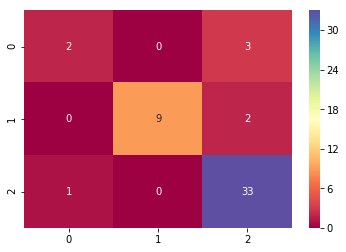

In [39]:
sns.heatmap(c_matrix,cmap = "Spectral",annot = True)

Logistic Regression: Objective and Cost Function (External links, not content owned by me!)
https://www.google.com/imgres?imgurl=https%3A%2F%2Fqph.fs.quoracdn.net%2Fmain-qimg-7c9b7670c90b286160a88cb599d1b733&imgrefurl=https%3A%2F%2Fwww.quora.com%2FWhy-is-logistic-regression-considered-a-linear-model&docid=cvREMHFISMUOSM&tbnid=myXo9H6XdLd48M%3A&vet=10ahUKEwirw8_G_8zdAhW8HjQIHcddASYQMwhNKBIwEg..i&w=602&h=402&bih=1199&biw=2226&q=objective%20function%20for%20logistic%20regression&ved=0ahUKEwirw8_G_8zdAhW8HjQIHcddASYQMwhNKBIwEg&iact=mrc&uact=8

https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiv67zq_8zdAhUfIjQIHdKIAasQjRx6BAgBEAU&url=https%3A%2F%2Fstats.stackexchange.com%2Fquestions%2F278771%2Fhow-is-the-cost-function-from-logistic-regression-derivated&psig=AOvVaw2txIDd6vv1MiObFt7OcLOU&ust=1537650265551757